In [1]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [2]:
df = pd.read_csv('diabetes.csv').head(620)

In [6]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
615,3,106,72,0,0,25.8,0.207,27,0
616,6,117,96,0,0,28.7,0.157,30,0
617,2,68,62,13,15,20.1,0.257,23,0
618,9,112,82,24,0,28.2,1.282,50,1


In [7]:
df[df.Outcome == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
610,3,106,54,21,158,30.9,0.292,24,0
613,6,105,80,28,0,32.5,0.878,26,0
615,3,106,72,0,0,25.8,0.207,27,0
616,6,117,96,0,0,28.7,0.157,30,0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Outcome']), df['Outcome'], test_size=0.2, random_state = 2020, shuffle=False)

In [9]:
clf = DecisionTreeClassifier(
    criterion="entropy", min_samples_leaf=10, max_leaf_nodes=15, random_state=2020
)


In [10]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
491,2,89,90,30,0,33.5,0.292,42
492,4,99,68,38,0,32.8,0.145,33
493,4,125,70,18,122,28.9,1.144,45
494,3,80,0,0,0,0.0,0.174,22


In [11]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=15,
                       min_samples_leaf=10, random_state=2020)

In [14]:
clf.score(X_test, y_test)

0.8467741935483871

In [15]:
f1_score(y_test, clf.predict(X_test), average='macro')

0.7978549978549979

In [16]:
df.drop(columns=['Outcome']).iloc[754]

IndexError: single positional indexer is out-of-bounds

In [25]:
import numpy as np

In [26]:
np.array(df.drop(columns=['Outcome']).iloc[754])

array([  8.   , 154.   ,  78.   ,  32.   ,   0.   ,  32.4  ,   0.443,
        45.   ])

In [30]:
clf.predict(np.array(df.drop(columns=['Outcome']).iloc[721]).reshape(1, -1))

c:\Users\Ivan\mambaforge-pypy3\envs\py39\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [10]:
clf.get_depth()

6

In [17]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

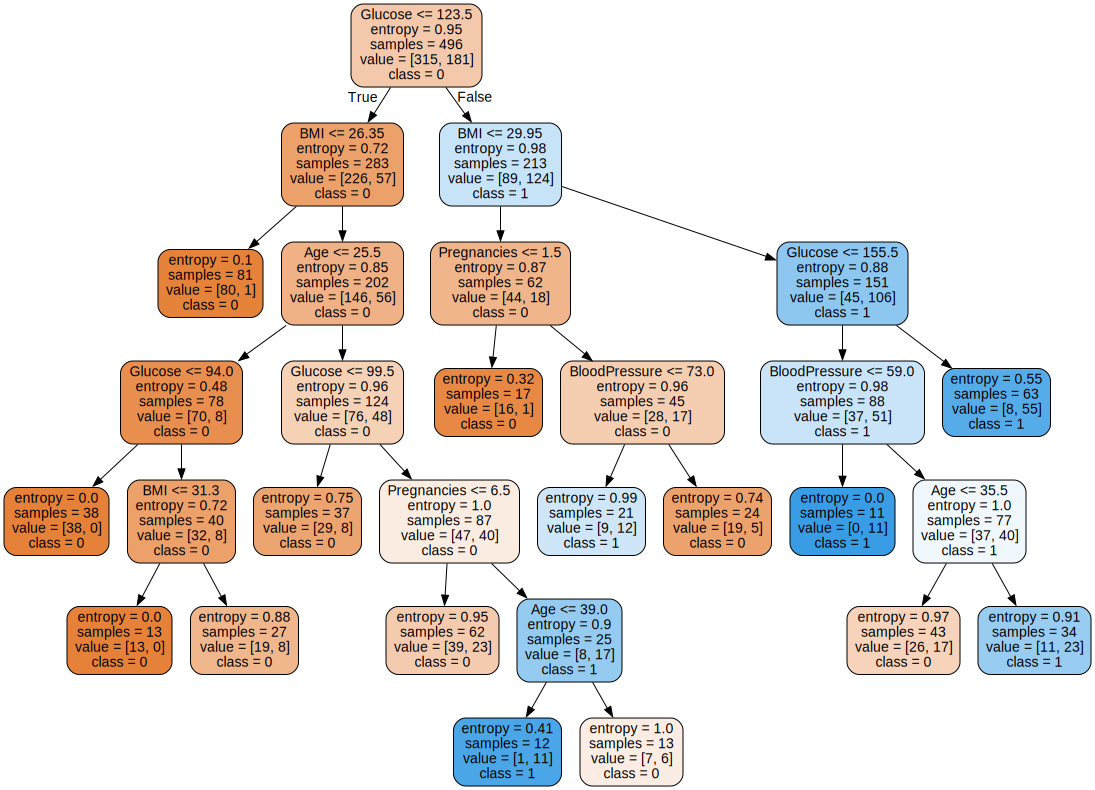

In [18]:
from sklearn.tree import export_graphviz
import graphviz
columns = list(X_train.columns)
export_graphviz(clf, out_file='tree.dot', 
                feature_names=columns,
                class_names=['0', '1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True, label='all')

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)